<h1> Demo on using data from Yahoo Finance for stock analysis </h1>

Python has been gaining significant traction in the financial industry.
Some experienced quantitative traders are using Python to develop and backtest a quantitative trading strategy
How to use Pandas to call a Finance API for stock data and easily calculate moving averages and other analysis

In the notebook, I am sharing the way to use Python Numpy, Pandas and Matplotlib to conduct some analysis.


<b> Importing the library required </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
! pip install yfinance

<b> Getting the data </b>

<b> Pulling ths historial data with Yahoo API </b>

In [ ]:
import yfinance as yf
start_date = '2015-01-01'
end_date = '2023-06-30'
NVDA = yf.download('NVDA',start = start_date, end = end_date)
NVDA.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,5.0325,5.0700,4.9525,5.0325,4.833630,11368000
2015-01-05,5.0325,5.0475,4.9250,4.9475,4.751988,19795200
2015-01-06,4.9550,4.9600,4.7925,4.7975,4.607913,19776400
2015-01-07,4.8325,4.8750,4.7700,4.7850,4.595909,32180800
2015-01-08,4.8400,4.9950,4.8375,4.9650,4.768796,28378000


In [ ]:
NVDA.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,424.640015,428.089996,420.149994,422.089996,422.089996,35632300
2023-06-26,424.609985,427.640015,401.000000,406.320007,406.320007,59432200
2023-06-27,407.989990,419.399994,404.480011,418.760010,418.760010,46217500
2023-06-28,406.600006,418.450012,405.179993,411.170013,411.170013,58263900
2023-06-29,415.579987,416.000000,406.000000,408.220001,408.220001,37965300


In [ ]:
AAPL = yf.download('AAPL',start = start_date, end = end_date)
AAPL.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.531767,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.840664,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.842905,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.177240,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.106180,237458000


In [ ]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,185.550003,187.559998,185.009995,186.679993,186.679993,53079300
2023-06-26,186.830002,188.050003,185.229996,185.270004,185.270004,48088700
2023-06-27,185.889999,188.389999,185.669998,188.059998,188.059998,50730800
2023-06-28,187.929993,189.899994,187.600006,189.250000,189.250000,51216800
2023-06-29,189.080002,190.070007,188.940002,189.589996,189.589996,46126000


In [ ]:
 AAPL.to_csv('AAPL_stock.csv')# save to csv file

<b> Initial Plot using the plot() function </b>

In [ ]:
AAPL.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
AAPL['Adj Close']

Date
2015-01-02     24.531767
2015-01-05     23.840664
2015-01-06     23.842905
2015-01-07     24.177240
2015-01-08     25.106180
                 ...    
2023-06-23    186.679993
2023-06-26    185.270004
2023-06-27    188.059998
2023-06-28    189.250000
2023-06-29    189.589996
Name: Adj Close, Length: 2137, dtype: float64

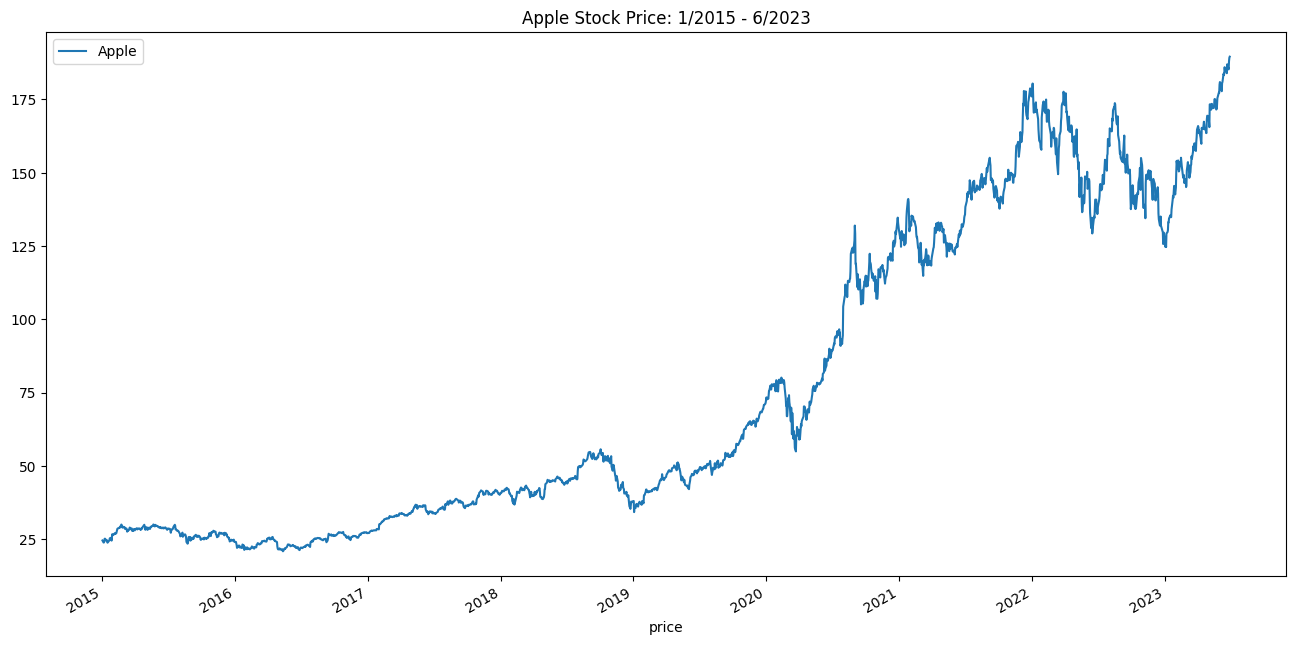

In [ ]:
AAPL['Adj Close'].plot(label = 'Apple', figsize = (16, 8))
plt.xlabel('date')
plt.xlabel('price')
plt.title('Apple Stock Price: 1/2015 - 6/2023')
plt.legend()

<b> Moving Average </b> <p>
Calculating  technical indicators used in technical analysis: <br>
-50 days moving average <br>
-200 days moving average <br>

In [ ]:
AAPL['MA50'] = AAPL['Adj Close'].rolling(50).mean()
AAPL['MA200'] = AAPL['Adj Close'].rolling(200).mean()

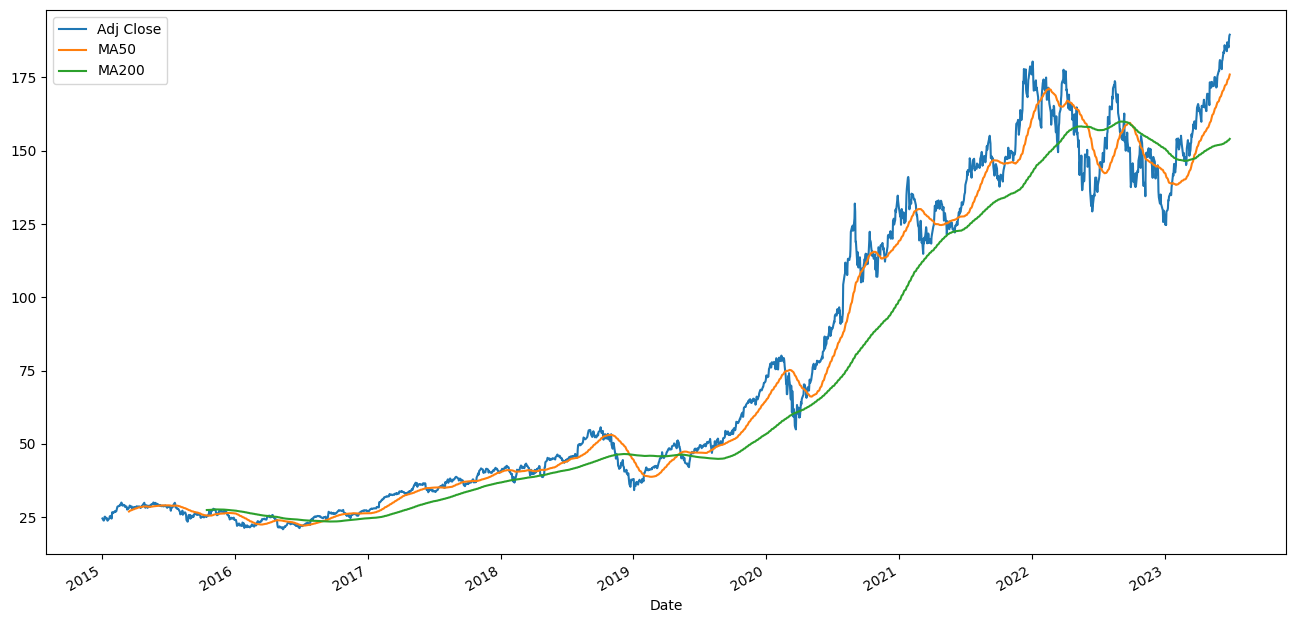

In [ ]:
AAPL[['Adj Close', 'MA50', 'MA200']].plot(figsize = (16,8));

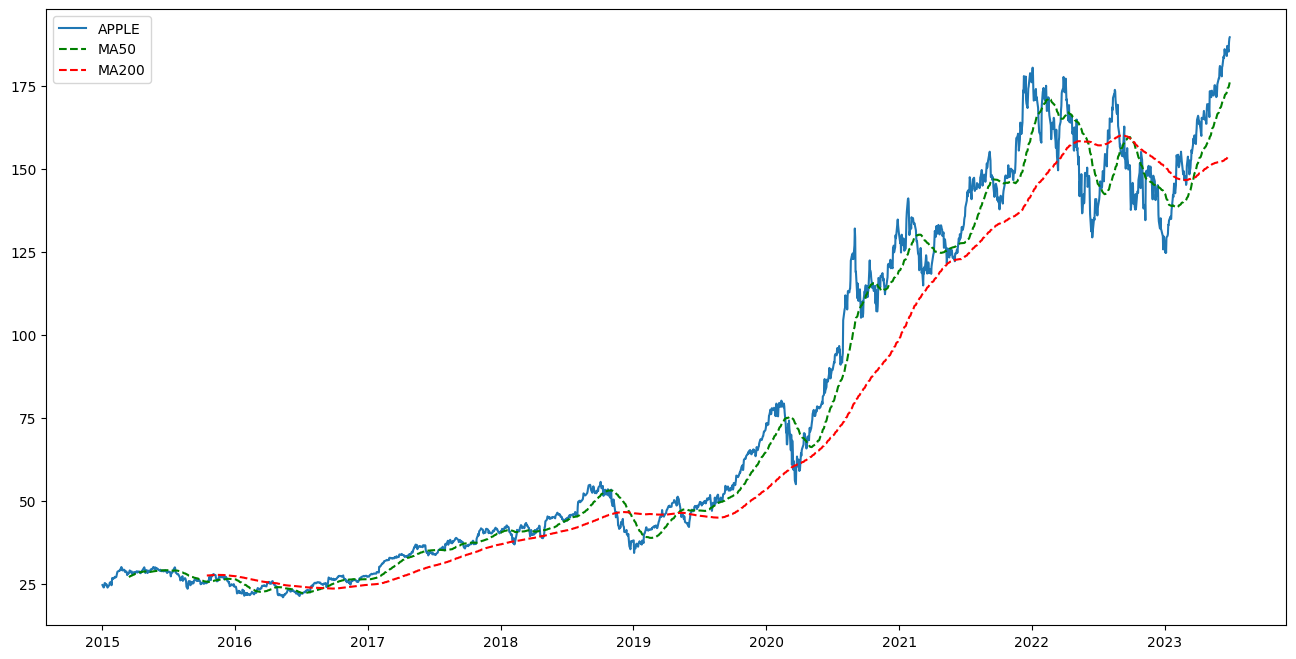

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(AAPL['Adj Close'], label="APPLE")
plt.plot(AAPL['MA50'],'g--',label='MA50')
plt.plot(AAPL['MA200'],'r--',label='MA200')
plt.legend()
plt.show()

<b> Calculation of Bollinger Bands </b>

1. Middle Band= 20-day simple moving average (SMA)
2. Upper Band= 20-day SMA+(20-day standard deviation of price x 2)
3. Lower Band= 20-day SMA–(20-day standard deviation of price x 2)

Bollinger Bands illustrate the relative strength or momentum of a stock [2]. BollingerBands act as an envelope around the price of a stock. The bands are more complicated,but they provide more insight than just using the moving average.

In [ ]:
AAPL['middle_band'] = AAPL['Adj Close'].rolling(window=20).mean()
AAPL['upper_band'] = AAPL['Adj Close'].rolling(window=20).mean() + AAPL['Adj Close'].rolling(window=20).std()*2
AAPL['lower_band'] = AAPL['Adj Close'].rolling(window=20).mean() - AAPL['Adj Close'].rolling(window=20).std()*2

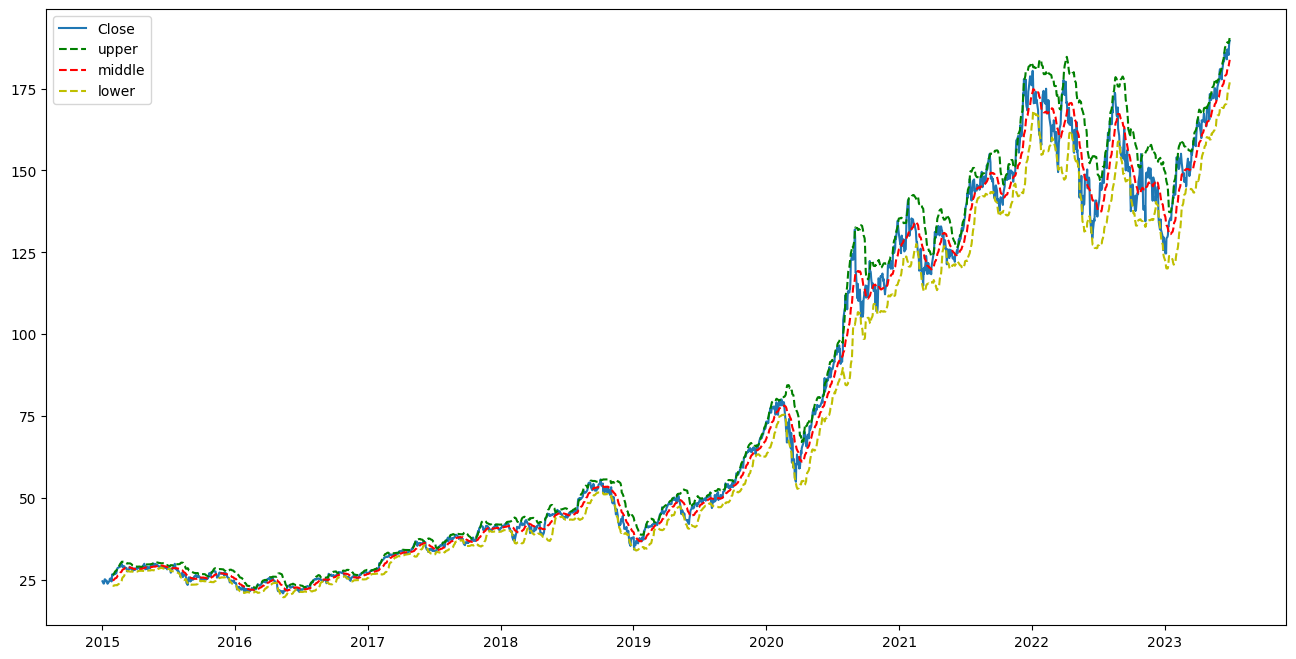

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(AAPL['Adj Close'], label="Close")
plt.plot(AAPL['upper_band'],'g--',label='upper')
plt.plot(AAPL['middle_band'],'r--',label='middle')
plt.plot(AAPL['lower_band'],'y--',label='lower')
plt.legend()
plt.show()

Zoom in the latest 365 transaction days

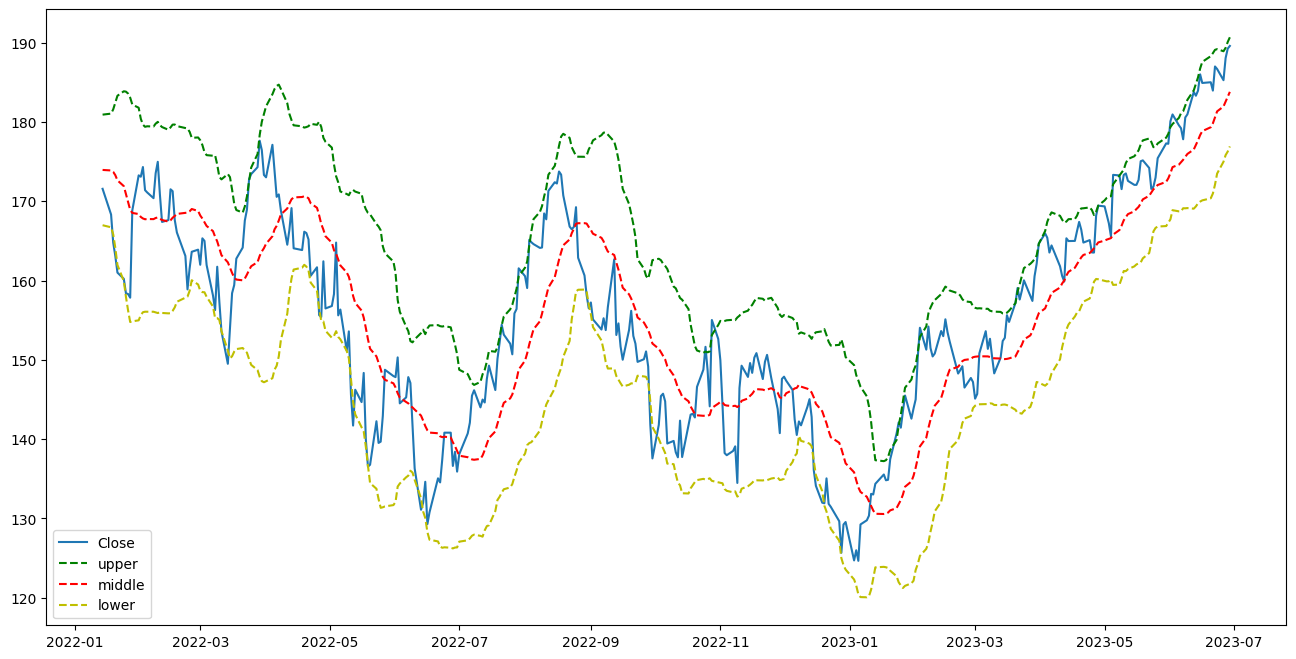

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(AAPL['Adj Close'].iloc[-365:], label="Close")
plt.plot(AAPL['upper_band'].iloc[-365:],'g--',label='upper')
plt.plot(AAPL['middle_band'].iloc[-365:],'r--',label='middle')
plt.plot(AAPL['lower_band'].iloc[-365:],'y--',label='lower')
plt.legend()
plt.show()

<b>Comparison Analysis</b>

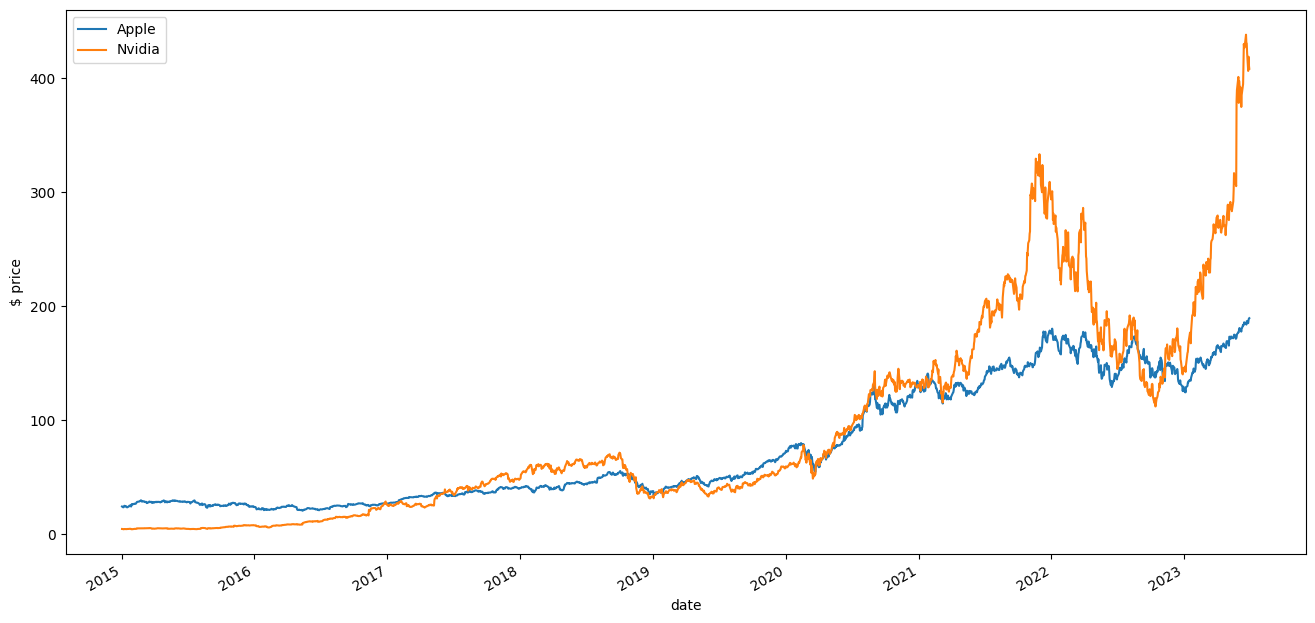

In [ ]:
AAPL['Adj Close'].plot(label = 'Apple', figsize = (16,8))
NVDA['Adj Close'].plot(label = 'Nvidia')
plt.xlabel("date")
plt.ylabel("$ price")
plt.legend();

In [ ]:
# Below I create a DataFrame consisting of the adjusted closing price of the stocks
stocks = pd.DataFrame({"Apple":AAPL["Adj Close"],
                       "Nvidia" : NVDA["Adj Close"]})

<Axes: xlabel='Date'>

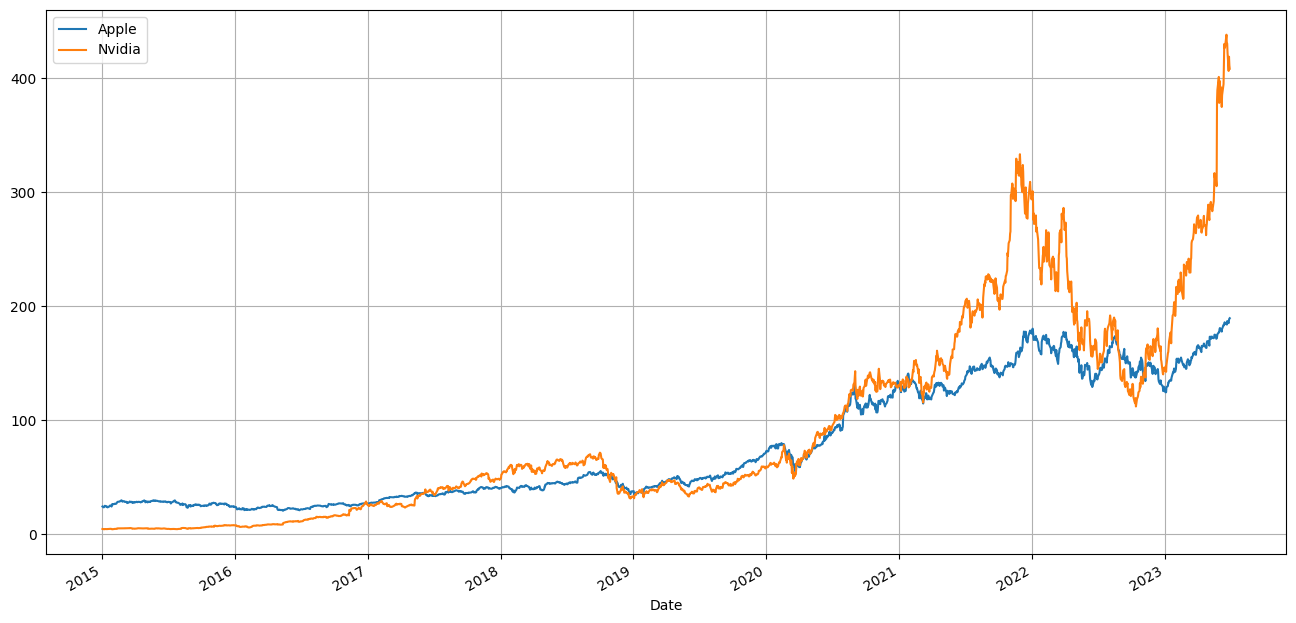

In [ ]:
stocks.plot(figsize = (16,8), grid=True)

<Axes: xlabel='Date'>

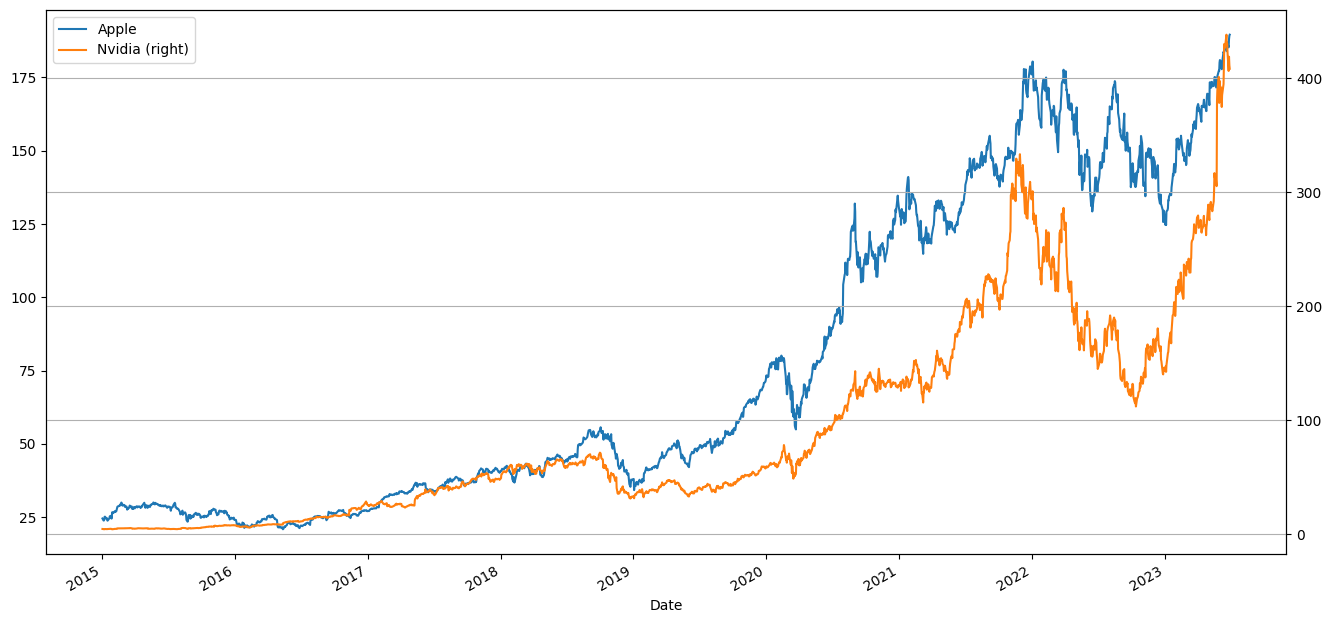

In [ ]:
stocks.plot(secondary_y=["Nvidia"],  figsize = (16,8), grid=True)

In [ ]:
stocks_return = stocks

In [ ]:
stocks_return['Apple'][0]

24.531766891479492

In [ ]:
stocks_return['Apple'] = stocks_return['Apple'] / stocks_return['Apple'][0]

In [ ]:
stocks_return['Nvidia'] = stocks_return['Nvidia'] / stocks_return['Nvidia'][0]

In [ ]:
stocks_return.head(5)

,Apple,Nvidia
Date,,
2015-01-02,1.000000,1.000000
2015-01-05,0.971828,0.983110
2015-01-06,0.971920,0.953303
2015-01-07,0.985548,0.950819
2015-01-08,1.023415,0.986587


In [ ]:
stocks_return.tail(5)

,Apple,Nvidia
Date,,
2023-06-23,7.609725,87.323612
2023-06-26,7.552249,84.061056
2023-06-27,7.665979,86.634691
2023-06-28,7.714487,85.064444
2023-06-29,7.728347,84.454134


<Axes: xlabel='Date'>

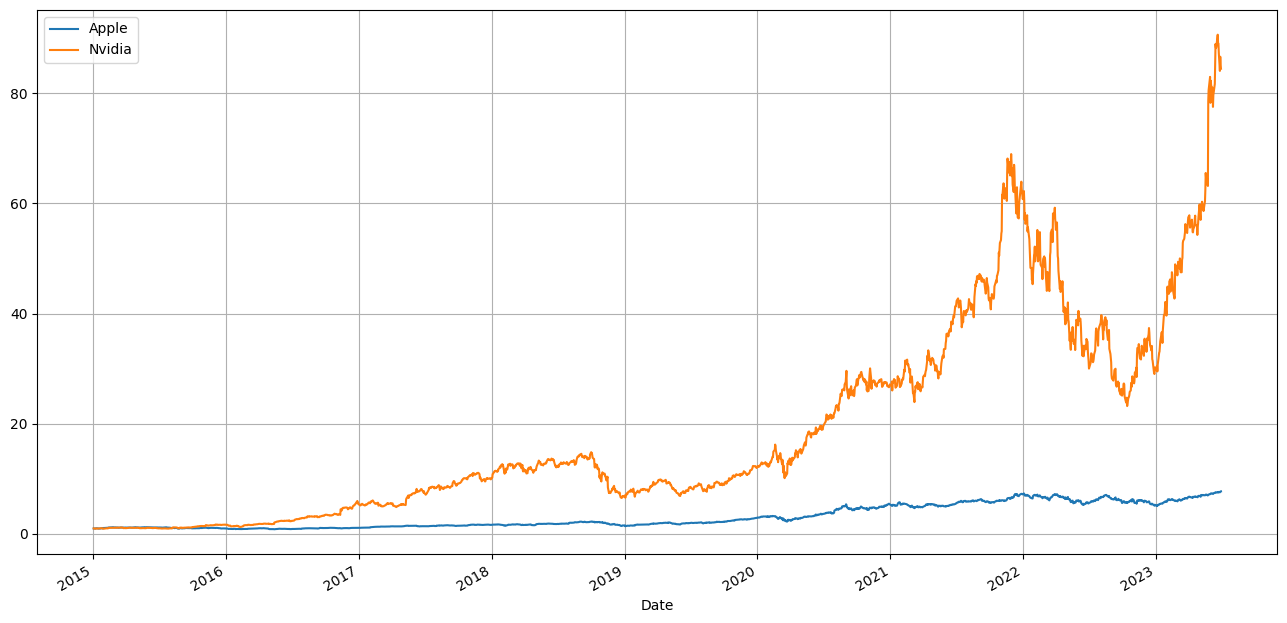

In [ ]:
stocks_return.plot(figsize = (16,8), grid=True)

Conclusion: AAPL's stock price performs better than Alibaba's stock price from 1/1/2015 to 30/06/2022.